# Prepare: 
The end result of this exercise should be a file named prepare.py.

In [22]:
#standard ds imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#datetime utilities
from datetime import timedelta, datetime

#custom imports
import acquire as ac

#remove warnings
import warnings
warnings.filterwarnings("ignore")

In [23]:
# get the data frame:
df = ac.acquire_store()
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   store_address  913000 non-null  object 
 6   store_zipcode  913000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 48.8+ MB


# Question 1: 
Convert date column to datetime format.

In [25]:
df['sale_date']  = pd.to_datetime(df['sale_date'], infer_datetime_format = True)

In [26]:
df.dtypes

sale_date        datetime64[ns]
sale_amount               int64
item_brand               object
item_name                object
item_price              float64
store_address            object
store_zipcode             int64
dtype: object

# Question 2: 
Plot the distribution of `sale_amount` and `item_price`.

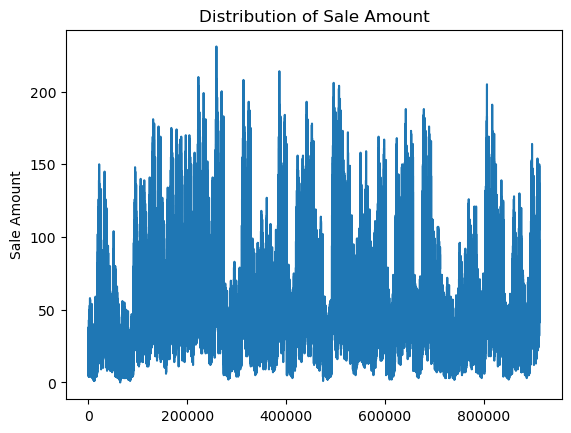

In [27]:
df.sale_amount.plot()
plt.title('Distribution of Sale Amount')
plt.ylabel('Sale Amount')
plt.show()

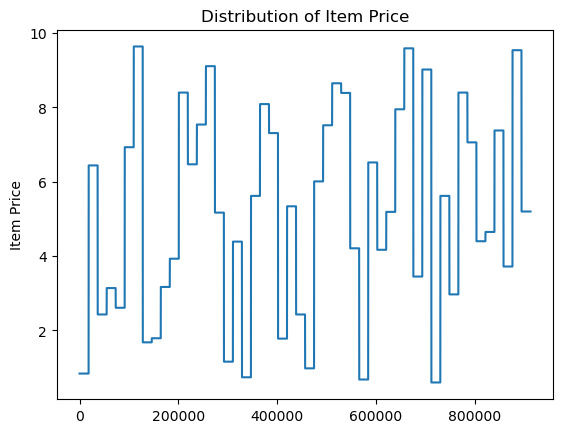

In [28]:
df.item_price.plot()
plt.title('Distribution of Item Price')
plt.ylabel('Item Price')
plt.show()

# Question 3:
Set the index to be the datetime variable.

In [29]:
df = df.set_index('sale_date')

In [30]:
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [31]:
df = df.sort_index()

In [32]:
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221


# Question 4: 
Add a 'month' and 'day of week' column to your dataframe.

In [33]:
df['month']= df.index.month_name()
df['day_of_week'] = df.index.day_name()

# Question 5: 
Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [34]:
df['sales_total'] = df['sale_amount'] *df['item_price']

# Question 6: 
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [35]:
def convert_to_datetime(df):
    '''
    This function takes in a dataframe
    and converts the sales_date column to a datetime
    '''
    df.sale_date = pd.to_datetime(df.sale_date, infer_datetime_format=True)
    return df

# Part 2: 

In [36]:
germany = ac.get_germany_data()
germany.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


# Question 1: 
Convert date column to datetime format.

In [37]:
#check current dtype- object
germany.Date.dtypes

dtype('O')

In [38]:
germany.Date = germany.Date.astype('datetime64[ns]')

In [39]:
#make sure
germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 205.5 KB


# Question 2: 
Plot the distribution of each of your variables.

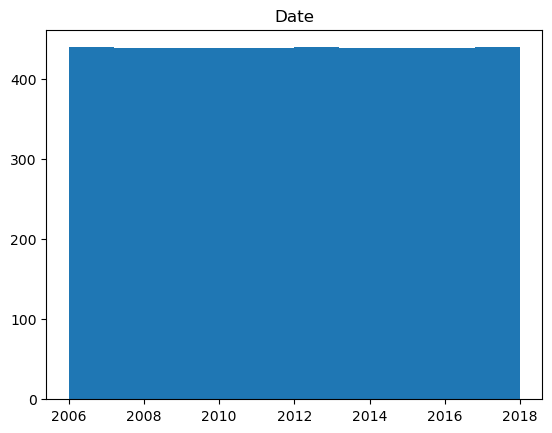

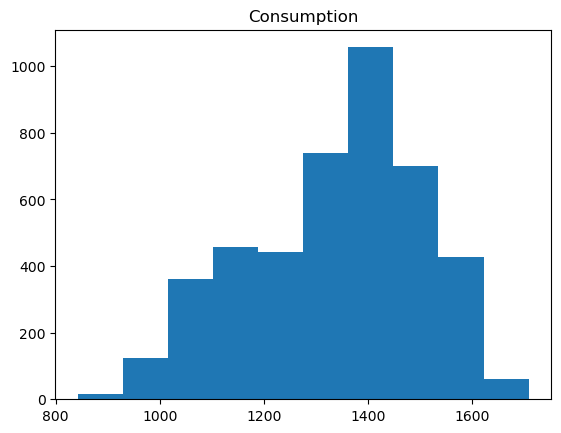

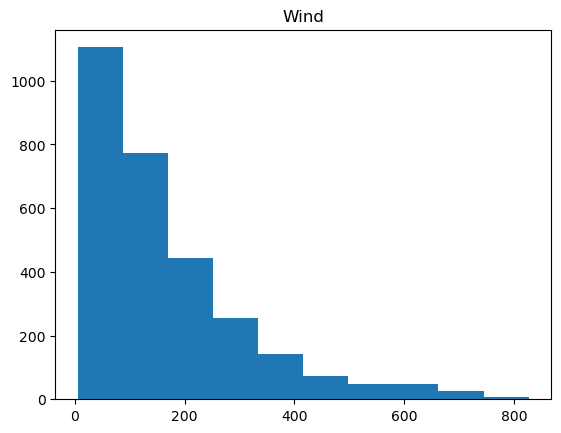

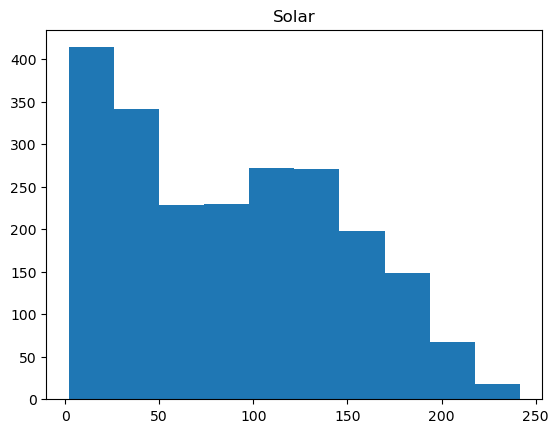

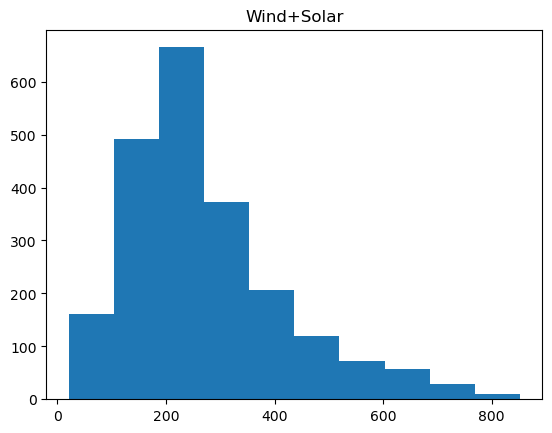

In [40]:
#visualize distribution
for col in germany.columns:
    plt.hist(germany[col])
    plt.title(col)
    plt.show()

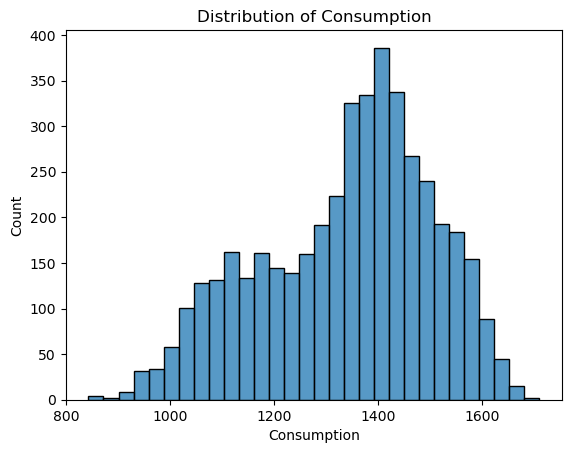

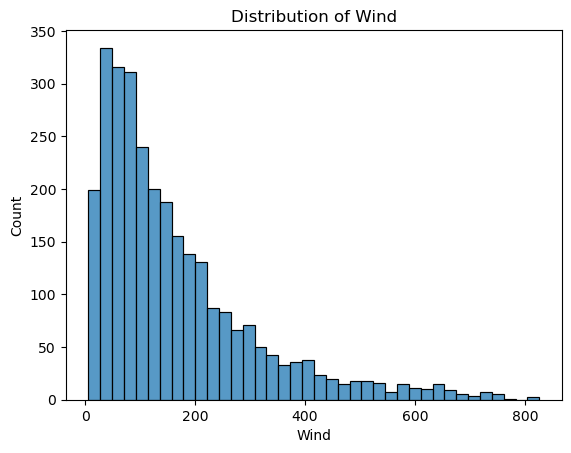

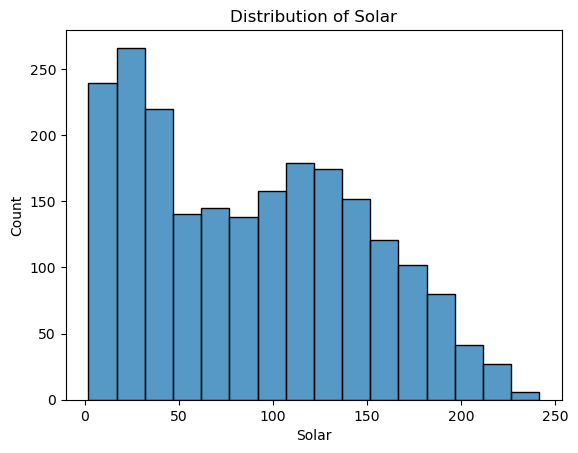

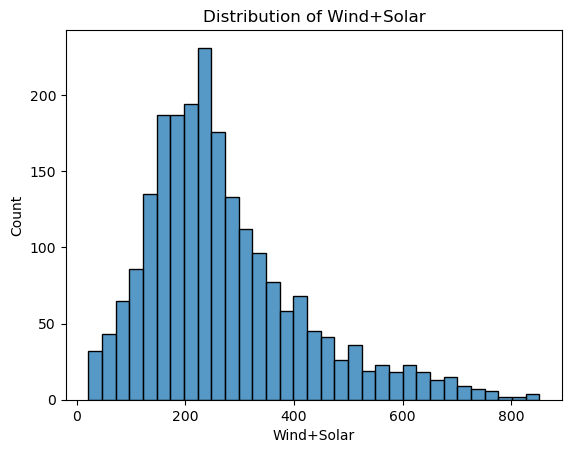

In [41]:
#complete the same thing using sns
for col in list(germany.columns.drop('Date')):
    plt.figure()
    sns.histplot(germany[col])
    plt.title('Distribution of {}'.format(col))

# Question 3: 
Set the index to be the datetime variable.

In [42]:
#check current index
type(germany.index)

pandas.core.indexes.numeric.Int64Index

In [43]:
germany = germany.set_index('Date').sort_index()

In [44]:
germany.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


# Question 4: 
Add a month and a year column to your dataframe.

In [45]:
#create new column for month
germany['month'] = germany.index.month_name()

#create new column for year
germany['year'] = germany.index.year

In [46]:
germany.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


# Question 5: 
Fill any missing values.

In [47]:
germany.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [48]:
for col in list(germany.columns):
    print(germany[col].isna().sum())

0
1463
2195
2196
0
0


In [49]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


In [50]:
germany.fillna(0, inplace = True)

# Question 6: 
 Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [51]:
def plot_distributions(df):
    for col in list(df.columns.drop('Date')):
        plt.figure()
        sns.histplot(df[col])
        plt.title('Distribution of {}'.format(col))